In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/data_customer_mall.csv')
print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     458989  Female          Yes   36       Yes       Engineer   
1     458994    Male          Yes   37       Yes     Healthcare   
2     458996  Female          Yes   69        No            NaN   
3     459000    Male          Yes   59        No      Executive   
4     459001  Female           No   19        No      Marketing   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 0.0            Low          1.0  Cat_6  
1                 8.0        Average          4.0  Cat_6  
2                 

In [ ]:
df['Age'].mean()

43.649790635706125

In [ ]:
df['Age'].mode()

,Age
0,42


In [ ]:
df['Age'].median()

41.0

In [ ]:
q1 = df['Age'].quantile(0.25)
print("Q1 : ",q1)

q3 = df['Age'].quantile(0.75)
print("Q3 : ",q3)

iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  30.0
Q3 :  53.0
IQR :  23.0


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


In [ ]:
# index agar memudahkan mengambil sebuah data
df.set_index('Gender', inplace=True)
df

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Gender,,,,,,,,,
Female,458989,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
Male,458994,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
Female,458996,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
Male,459000,Yes,59,No,Executive,11.0,High,2.0,Cat_6
Female,459001,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
Male,467954,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
Female,467958,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
Female,467960,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6


<Axes: >

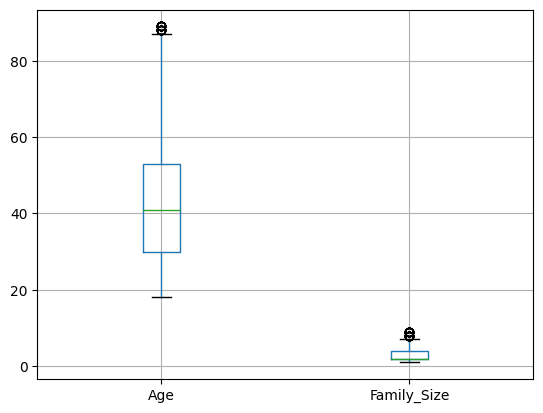

In [ ]:
# Visualisasi
df.boxplot(column=['Age', 'Family_Size',])


In [ ]:
lower_bound = q1 -1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Tentukan outlier dalam DataFrame
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("Outlier Age :")
print(outliers)

Outlier Age :
            ID Ever_Married  Age Graduated Profession  Work_Experience  \
Gender                                                                   
Female  459045          Yes   88       Yes     Lawyer              1.0   
Male    459080          Yes   89        No     Lawyer              1.0   
Female  459194          Yes   89       Yes     Lawyer              0.0   
Female  459344          Yes   88       Yes     Artist              1.0   
Female  459410          Yes   88       Yes     Lawyer              1.0   
Female  459576          Yes   88        No     Lawyer              NaN   
Male    459665          Yes   88       Yes     Artist              4.0   
Female  460272           No   88       Yes     Lawyer              0.0   
Male    460447          NaN   89        No     Lawyer              0.0   
Female  460542          Yes   89        No     Lawyer              1.0   
Female  460906          Yes   89       Yes     Lawyer              1.0   
Female  461292          

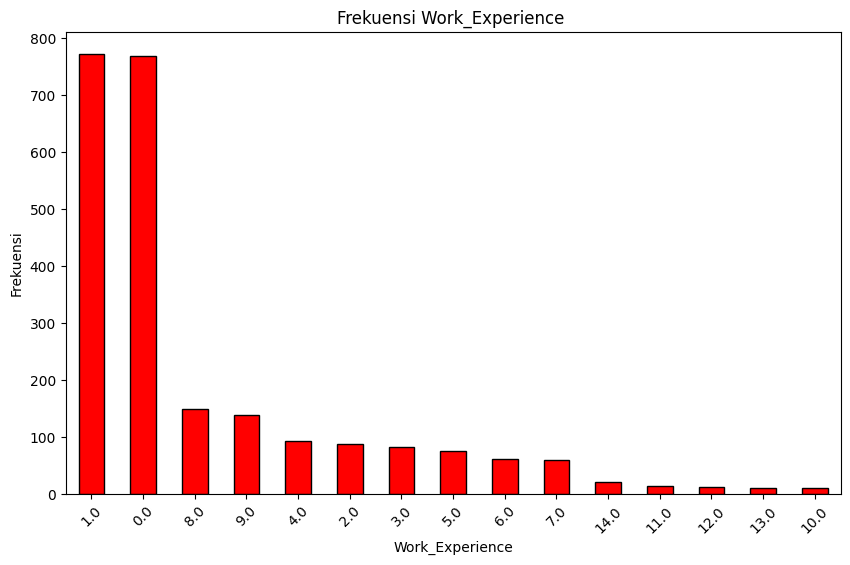

In [ ]:
import matplotlib.pyplot as plt

product_counts = df["Work_Experience"].value_counts()

# ukuran gambar
plt.figure(figsize=(10, 6))

# membuat diagram batangnya
product_counts.plot(kind='bar', color='red', edgecolor='black')

# membuat Label untuk diagram
plt.title('Frekuensi Work_Experience ')
plt.xlabel('Work_Experience')
plt.ylabel('Frekuensi')

# sumbu x diputar agar rapih
plt.xticks(rotation=45)

# menampilkan diagram
plt.show()

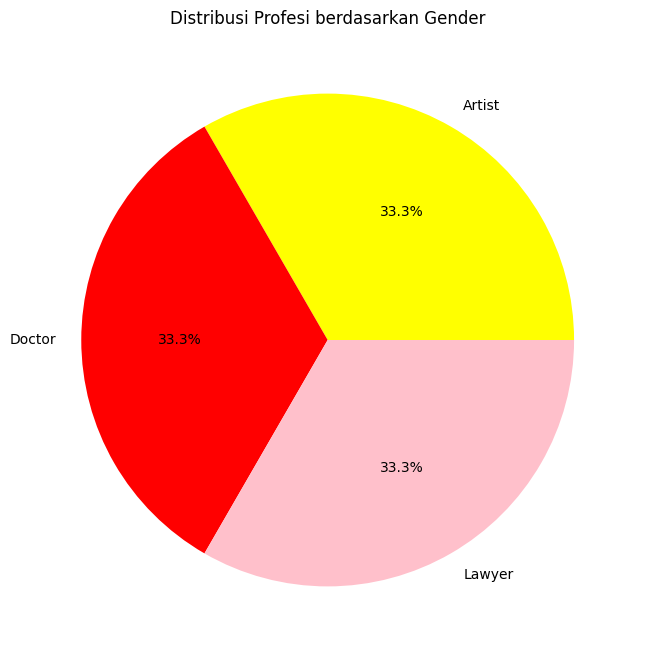

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh DataFrame
data = {
    'Fropesi': ['Doctor', 'Artist', 'Lawyer', 'Doctor', 'Artist', 'Lawyer'],
    'Gender': ['Female', 'Male ', 'Female', 'Male ', 'Female', 'Male ']
}

df = pd.DataFrame(data)

# Pie chart untuk Profesi
plt.figure(figsize=(8, 8))
df.groupby('Fropesi')['Gender'].count().plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'red', 'pink'])

# Menambahkan label dan judul
plt.title('Distribusi Profesi berdasarkan Gender')
plt.ylabel('')  # Menghilangkan label y-axis
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Contoh data untuk DataFrame
data = {
    'Age': [88, 89, 22, 36, 19]
}

df = pd.DataFrame(data)

# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Normalisasi kolom Age
df['Age Min-Max'] = scaler.fit_transform(df[['Age']])

# Menampilkan hasil
print(df[['Age', 'Age Min-Max']])


   Age  Age Min-Max
0   88     0.985714
1   89     1.000000
2   22     0.042857
3   36     0.242857
4   19     0.000000


In [ ]:
# Normalisasi
from sklearn.preprocessing import StandardScaler

# Inisialisasi Standard Scaler
scaler = StandardScaler()

# Menormalisasi kolom Penjualan Bersih menggunakan Z-Score
df['Age Z-Score'] = scaler.fit_transform(df[['Age']])
=
# Menampilkan hasil normalisasi
print(df[['Age', 'Age Z-Score']])

   Age  Age Z-Score
0   88     1.187971
1   89     1.219906
2   22    -0.919720
3   36    -0.472634
4   19    -1.015524


In [ ]:
# Normalisasi
from sklearn.preprocessing import MaxAbsScaler

# Inisialisasi MaxAbsScaler
scaler = MaxAbsScaler()

# Normalisasi kolom Penjualan Bersih dengan Max Abs Scaler
df['Age Max Abs'] = scaler.fit_transform(df[['Age']])

# Menampilkan hasil normalisasi
print(df[['Age', 'Age Max Abs']])

   Age  Age Max Abs
0   88     0.988764
1   89     1.000000
2   22     0.247191
3   36     0.404494
4   19     0.213483
